In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Manage data (NB: why is there 81 rows? So far in the paper we have only used 78 individuals...)

In [75]:
# Load data as .csv file
df = pd.read_csv('../Data/fs6_fs7_rbans_v2.csv')

# Rename columns to make compatible, i.e.
    #   *_Thalamus_Proper --> *_Thalamus (only fs6)
    #   *_Accumbens-area --> *_Accumbens (fs6 and fs7)
mapping = {
    'Left-Thalamus-Proper_fs6': 'Left-Thalamus_fs6',
    'Right-Thalamus-Proper_fs6': 'Right-Thalamus_fs6',
    'Left-Accumbens-area_fs6': 'Left-Accumbens_fs6',
    'Right-Accumbens-area_fs6': 'Right-Accumbens_fs6',
    'Left-Accumbens-area_fs7': 'Left-Accumbens_fs7',
    'Right-Accumbens-area_fs7': 'Right-Accumbens_fs7'
}
df.rename(columns=mapping, inplace=True)
# for i in df.columns:
#     print(i)

In [76]:
len(df.columns)

184

## Find and remove the three individuals surplus

In [77]:
df_v2 = df.copy()
df_correct_subjects = pd.read_csv('../../data/v1/data_v1_brain_psych_skrobisz_normalized_78x39.csv')

ids_v1 = np.array(df_correct_subjects['Subject'])
ids_v1 = [i[-3:] for i in ids_v1]
ids_v2 = np.array(df_v2['BG_ID'])
ids_v2 = [i[-3:] for i in ids_v2]

print(len(ids_v1), len(ids_v2))
for i in ids_v2:
    if i not in ids_v1:
        print(i)

78 81
061
119
146


In [78]:
df = df[df['BG_ID'] != 'BGA_061']
df = df[df['BG_ID'] != 'BGA_119']
df = df[df['BG_ID'] != 'BGA_146']
df

,BG_ID,IBS_Low_fRBANS,IBS SSS,BG.1,"Diagnose (1=D, 2=C, 3=M, 0=HC)",Group,Age,Birthdate,Testdate,Gender1,...,5th-Ventricle_fs6,WM-hypointensities_fs6,non-WM-hypointensities_fs6,Optic-Chiasm_fs6,CC_Posterior_fs6,CC_Mid_Posterior_fs6,CC_Central_fs6,CC_Mid_Anterior_fs6,CC_Anterior_fs6,eTIV_fs6
0,BGA_046,0,195,4,1,1,38,29541,43612,male,...,1.9,1151.7,0.0,220.5,958.5,586.5,496.3,538.9,1225.7,1.656739e+06
1,BGA_047,0,325,5,3,1,19,36451,43612,female,...,0.0,747.0,0.0,161.6,875.8,552.5,436.0,542.0,711.4,1.298615e+06
2,BGA_048,0,326,6,1,1,34,30925,43612,female,...,0.0,661.5,0.0,178.6,943.0,556.5,455.2,668.8,839.3,1.292984e+06
3,BGA_050,0,357,8,3,1,44,27383,43619,female,...,0.0,1079.3,0.0,153.8,1306.7,803.7,798.5,1167.6,1200.0,1.633022e+06
4,BGA_051,0,293,9,1,1,38,29682,43619,male,...,0.0,980.1,0.0,184.0,1084.3,599.9,522.6,624.9,803.2,1.573626e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,BGA_166,0,56,124,0,2,19,NaN,,female,...,0.0,767.1,0.0,118.1,806.9,523.1,409.6,477.2,928.6,1.354683e+06
77,BGA_167,0,25,125,0,2,52,,,female,...,0.0,841.2,0.0,127.0,876.8,412.2,417.6,428.4,1037.4,1.352272e+06
78,BGA_168,0,21,126,0,2,50,,,female,...,0.0,3333.0,0.0,209.8,990.0,635.7,532.5,502.9,907.7,1.598696e+06
79,BGA_171,0,32,129,0,2,21,36466,44341,male,...,0.0,999.3,0.0,174.5,862.4,503.3,795.0,687.8,760.7,1.559106e+06


## Plot correlation plots for each corresponding pair of volumes

In [79]:
# for i in df.columns:
#     print(i)

In [80]:
cols = df.columns
volumes = []
for col in cols:
    if '_fs7' in col:
        volumes.append(col[:-4])
print(len(volumes))

46


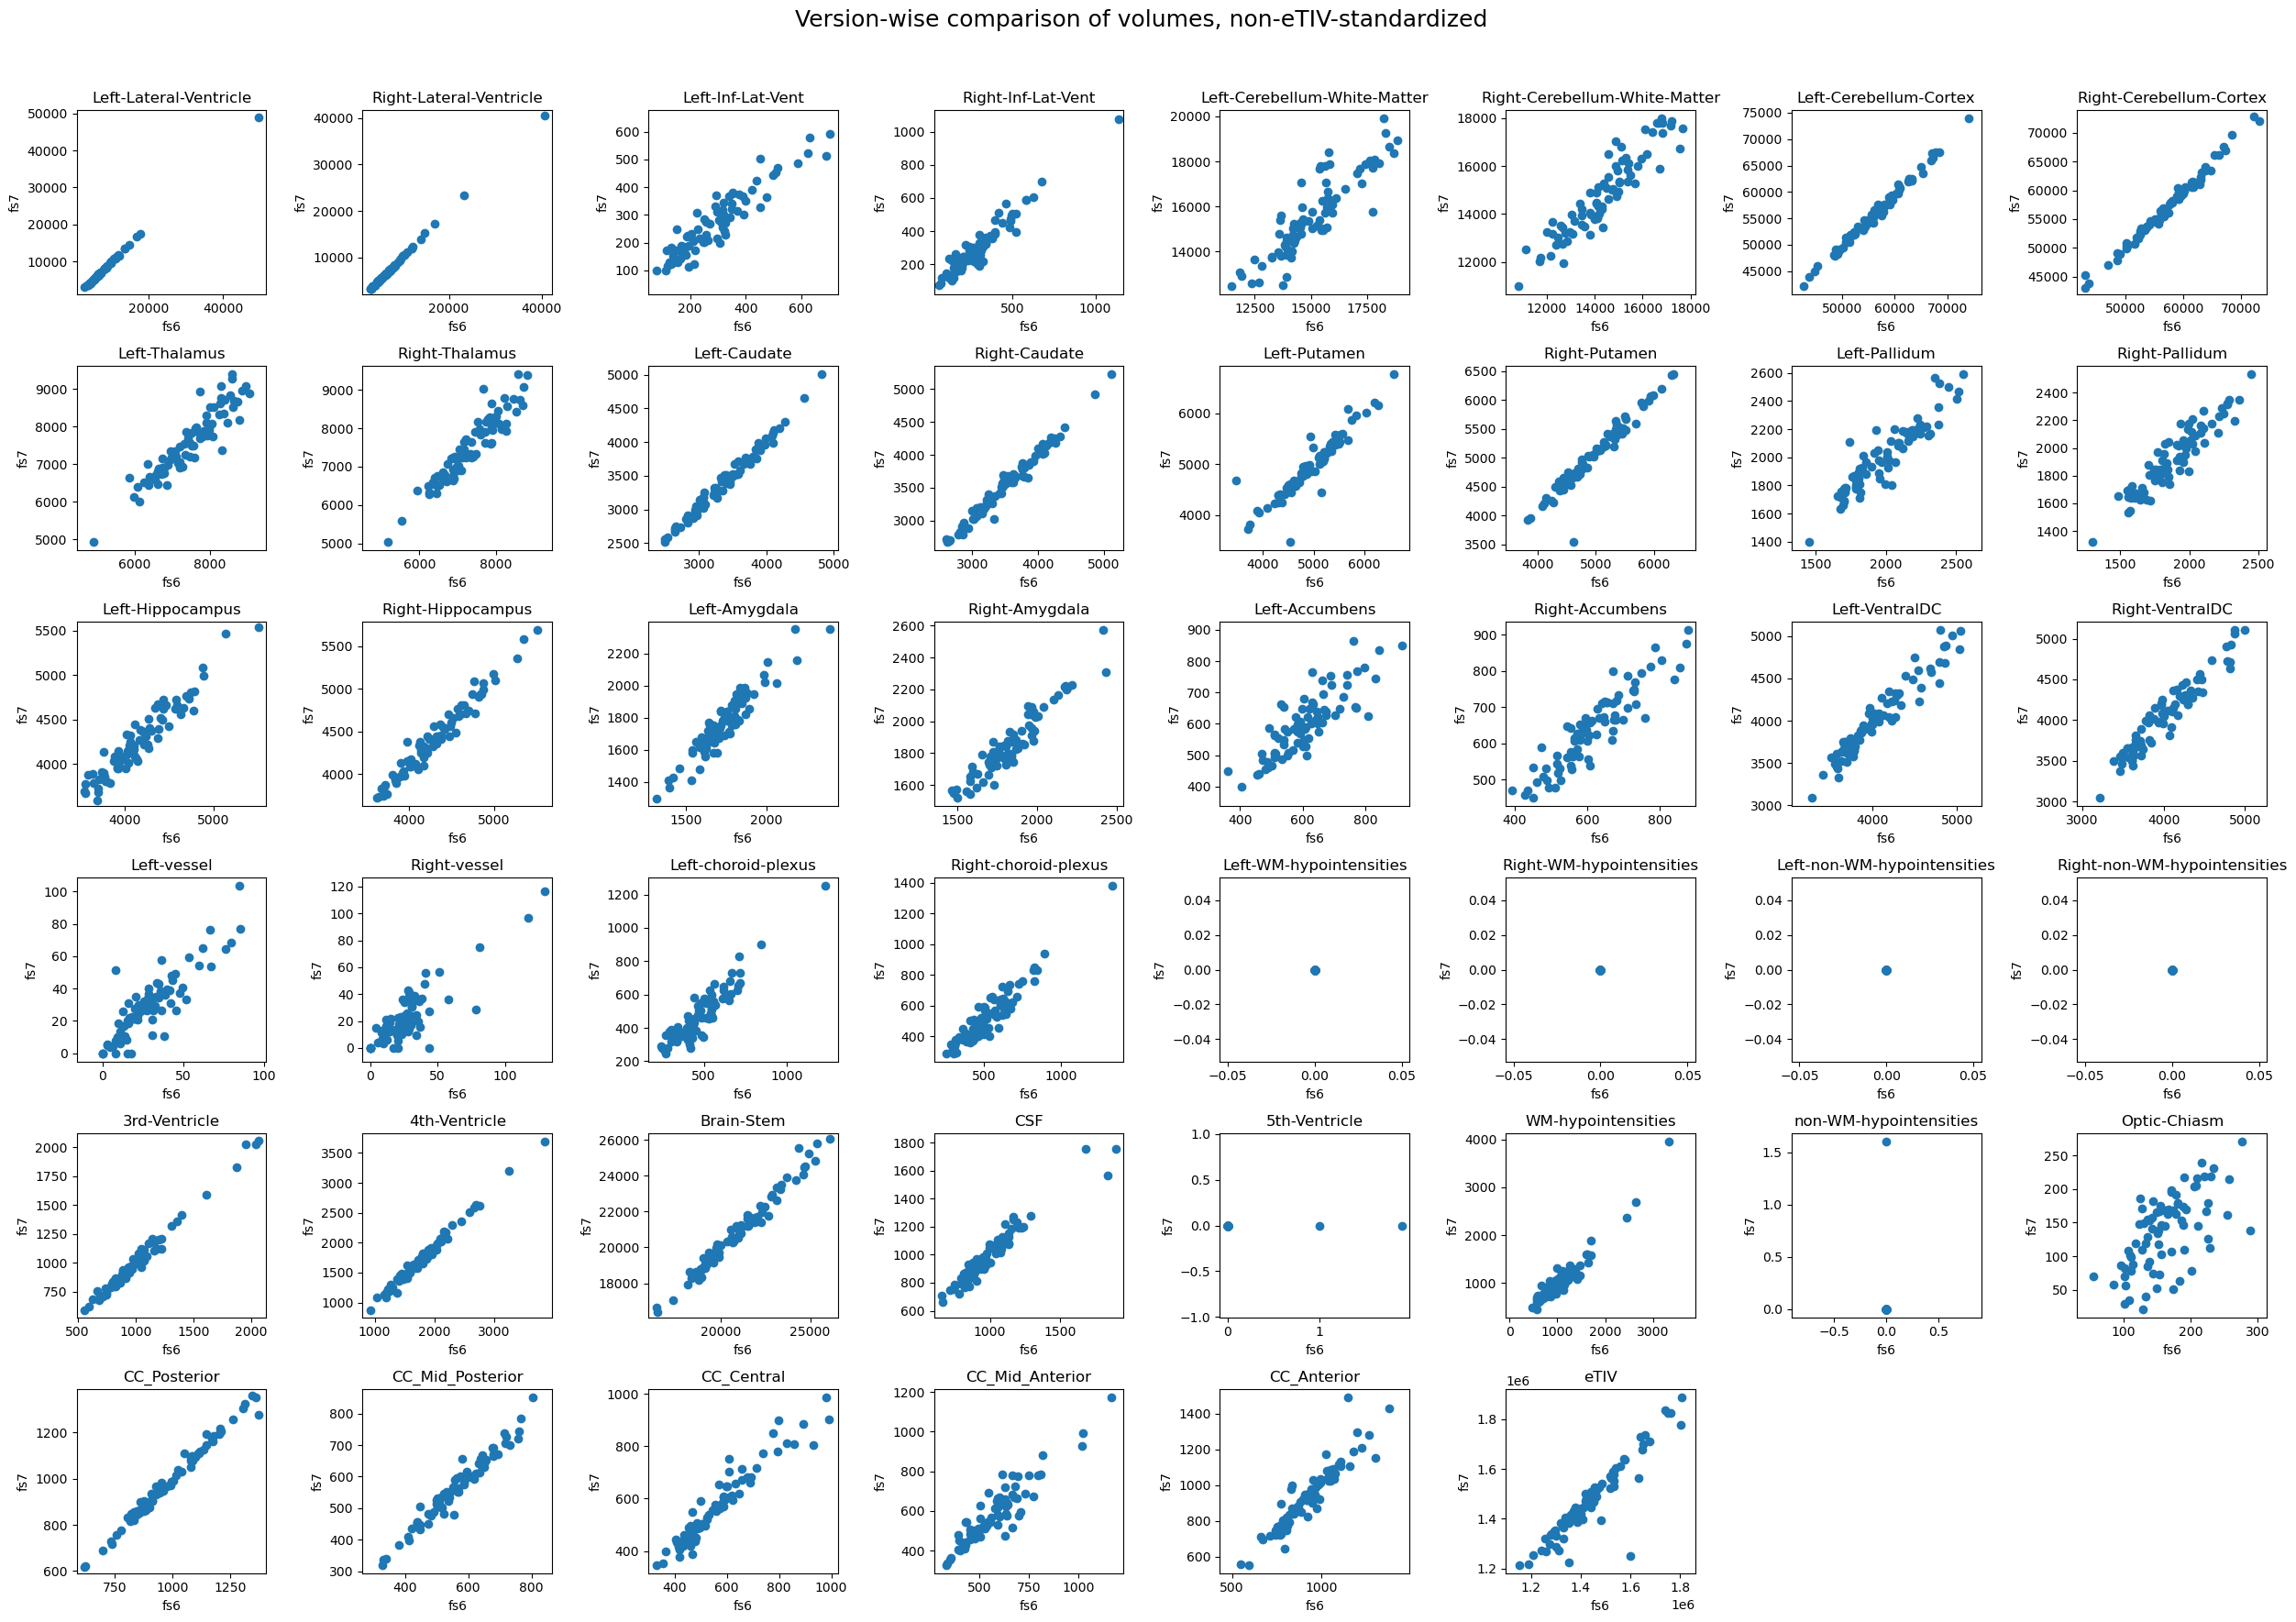

In [81]:
# Create a 3x5 grid of subplots
fig, axes = plt.subplots(6, 8, figsize=(25, 18))
fig.suptitle('Version-wise comparison of volumes, non-eTIV-standardized', fontsize=18)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each pair of rows in the grid
i = 0
for vol in volumes:
    
    col1 = df[f'{vol}_fs6']     # The first row of the pair
    col2 = df[f'{vol}_fs7'] # The second row of the pair
    
    # Plot row1 against row2
    ax = axes[i]
    ax.axis('equal')
    ax.scatter(x = col1, y = col2)
    ax.set_xlabel('fs6')
    ax.set_ylabel('fs7')
    
    # Add title and legend to each subplot
    ax.set_title(f'{vol}')

    i += 1
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [82]:
# Standardize volumes to eTIV

df_etiv_normed = df.copy()

for vol in volumes:
    for v in ['_fs6', '_fs7']:
        if vol != 'eTIV':
            df_etiv_normed[vol+v] = df_etiv_normed[vol+v] / df['eTIV'+v]

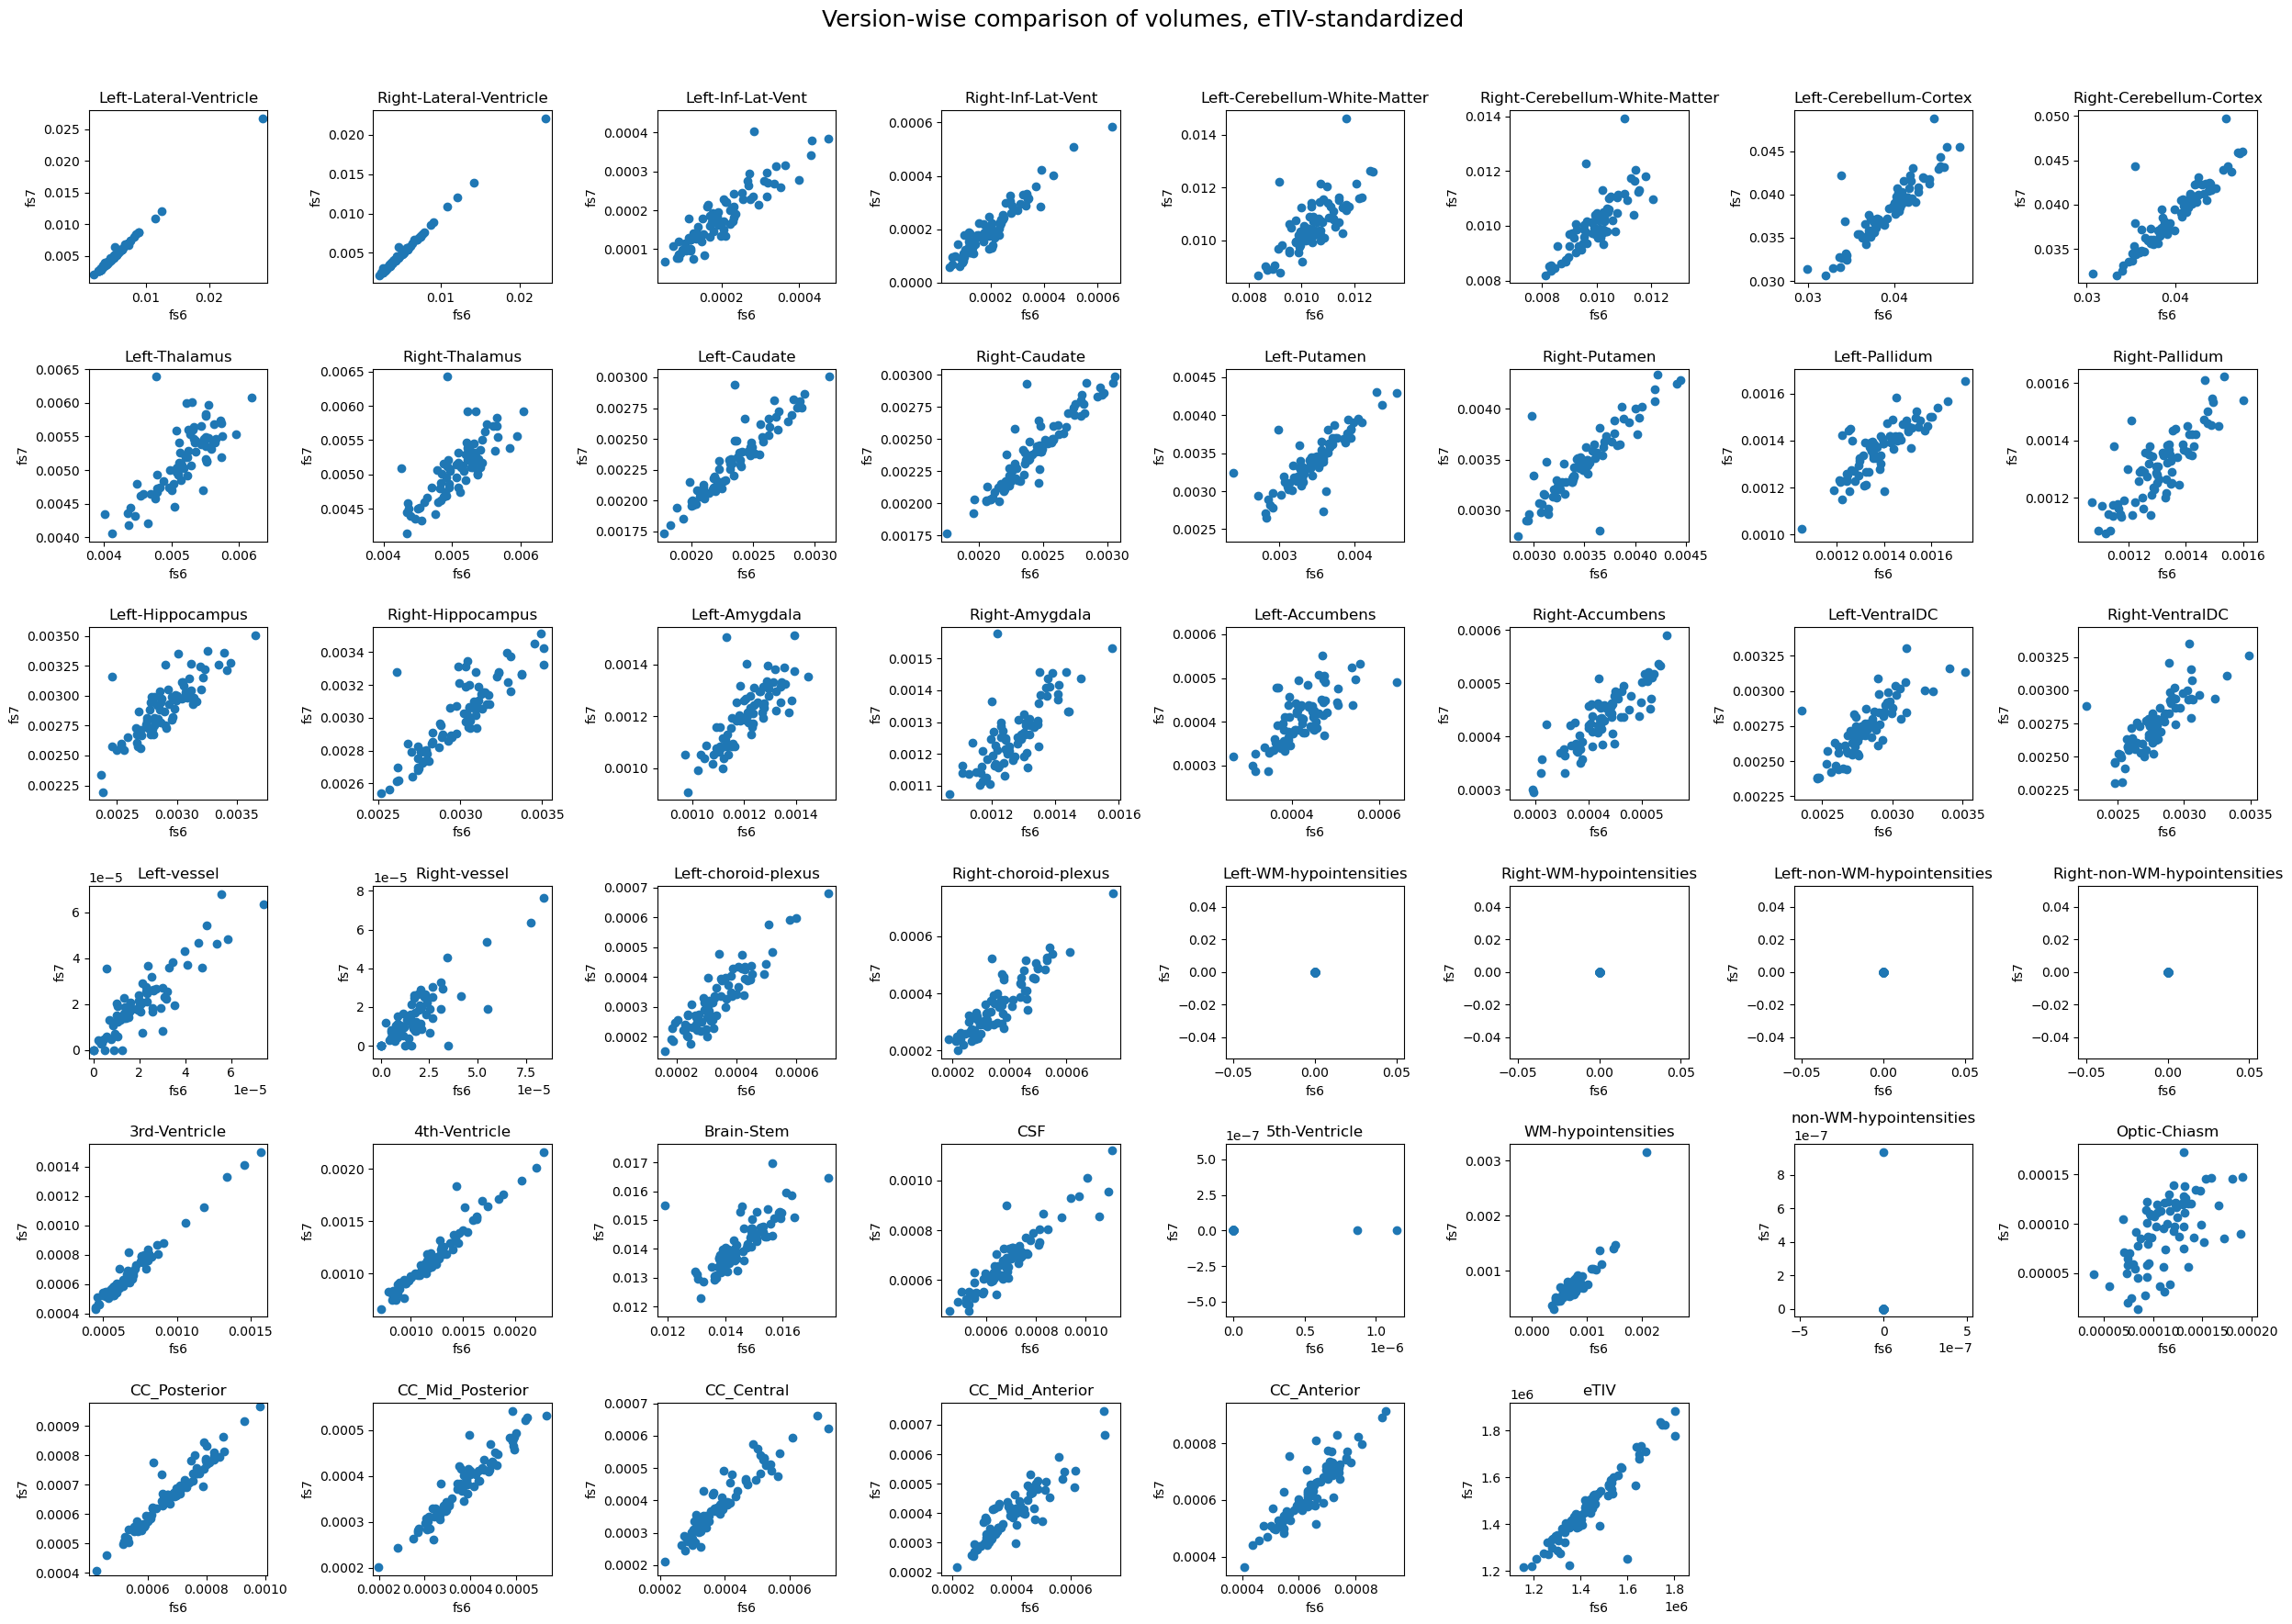

In [83]:
# Create a 3x5 grid of subplots
fig, axes = plt.subplots(6, 8, figsize=(25, 18))
fig.suptitle('Version-wise comparison of volumes, eTIV-standardized', fontsize=18)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each pair of rows in the grid
i = 0
for vol in volumes:
    
    col1 = df_etiv_normed[f'{vol}_fs6']     # The first row of the pair
    col2 = df_etiv_normed[f'{vol}_fs7']     # The second row of the pair
    
    # Plot row1 against row2
    ax = axes[i]
    ax.axis('equal')
    ax.scatter(x = col1, y = col2)
    ax.set_xlabel('fs6')
    ax.set_ylabel('fs7')
    
    # Add title and legend to each subplot
    ax.set_title(f'{vol}')

    i += 1
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [84]:
# Remove non-varying volumes

remove = [
    'Left-WM-hypointensities',
    'Right-WM-hypointensities',
    'Left-non-WM-hypointensities',
    'Right-non-WM-hypointensities',
    '5th-Ventricle',
    'non-WM-hypointensities'
]

volumes = [i for i in volumes if i not in remove]

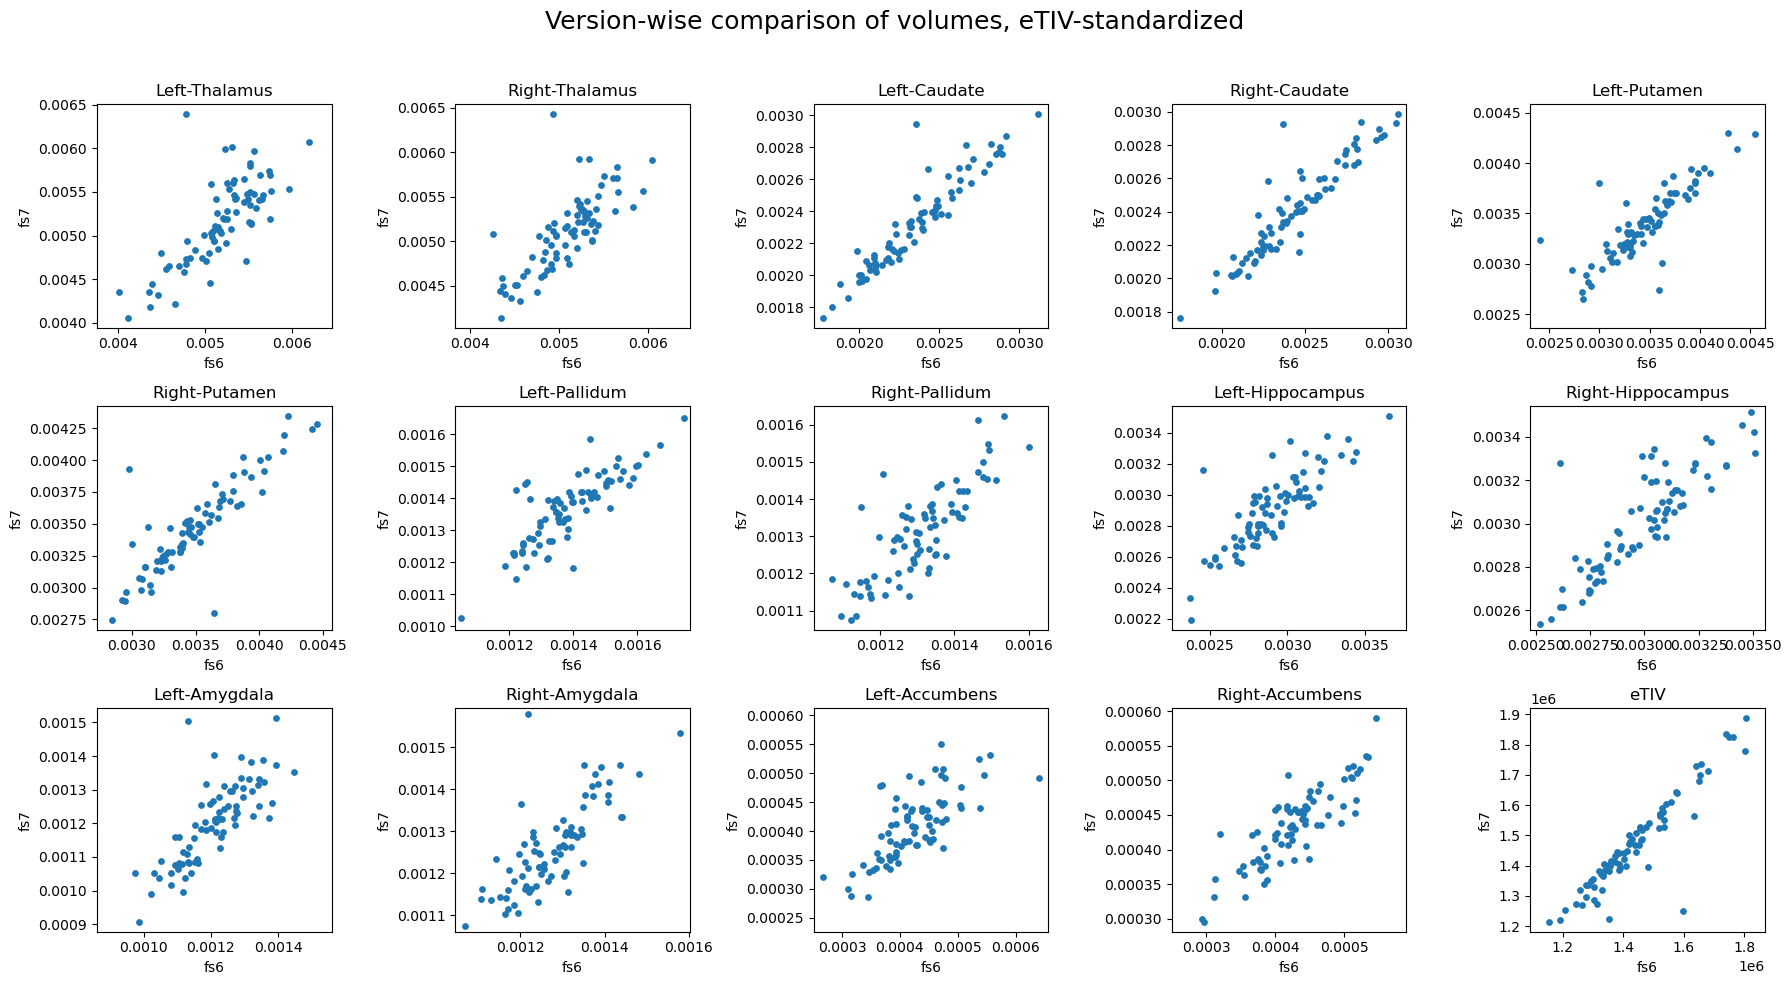

In [85]:
# Create plot with subset of volumes

subset_vols = ['Thalamus', 'Caudate', 'Putamen', 'Pallidum', 'Hippocampus', 'Amygdala', 'Accumbens']
subset_labels = []
for vol in subset_vols:
    subset_labels.append('Left-'+vol)
    subset_labels.append('Right-'+vol)
subset_labels.append('eTIV')

# Create a 3x5 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(18, 10))
fig.suptitle('Version-wise comparison of volumes, eTIV-standardized', fontsize=18)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each pair of rows in the grid
i = 0
for vol in subset_labels:
    
    col1 = df_etiv_normed[f'{vol}_fs6']     # The first row of the pair
    col2 = df_etiv_normed[f'{vol}_fs7']     # The second row of the pair
    
    # Plot row1 against row2
    ax = axes[i]
    ax.axis('equal')
    ax.scatter(x = col1, y = col2, s=15)
    ax.set_xlabel('fs6')
    ax.set_ylabel('fs7')
    
    # Add title and legend to each subplot
    ax.set_title(f'{vol}')

    i += 1

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('../Figs/version_comparison')
plt.show()

# Generate summary statistics of volumes, version-wise

In [86]:
df_ibs = df_etiv_normed[df_etiv_normed['Diagnose (1=D, 2=C, 3=M, 0=HC)  '] != 0]
df_hc = df_etiv_normed[df_etiv_normed['Diagnose (1=D, 2=C, 3=M, 0=HC)  '] == 0]
print(df_ibs.shape, df_hc.shape)

(49, 184) (29, 184)


In [87]:
empty = ['' for _ in range(len(volumes))]
summary_volumes = pd.DataFrame({
    'Brain Region': volumes,
    'Mean HC 6': empty,
    'SD HC 6': empty,
    'Mean IBS 6': empty,
    'SD IBS 6' : empty,
    'Mean HC 7': empty,
    'SD HC 7': empty,
    'Mean IBS 7': empty,
    'SD IBS 7' : empty,
})
summary_volumes

# Add statistics from FS6
for vol in volumes:
    ibs_current_vol = np.array(df_ibs[f'{vol}_fs6'])
    mean = np.mean(ibs_current_vol)
    sd = np.std(ibs_current_vol)
    summary_volumes.loc[summary_volumes['Brain Region']==vol, 'Mean IBS 6'] = mean
    summary_volumes.loc[summary_volumes['Brain Region']==vol, 'SD IBS 6'] = sd

    hc_current_vol = np.array(df_hc[f'{vol}_fs6'])
    mean = np.mean(hc_current_vol)
    sd = np.std(hc_current_vol)
    summary_volumes.loc[summary_volumes['Brain Region']==vol, 'Mean HC 6'] = mean
    summary_volumes.loc[summary_volumes['Brain Region']==vol, 'SD HC 6'] = sd

# Add statistics from FS7
for vol in volumes:
    ibs_current_vol = np.array(df_ibs[f'{vol}_fs7'])
    mean = np.mean(ibs_current_vol)
    sd = np.std(ibs_current_vol)
    summary_volumes.loc[summary_volumes['Brain Region']==vol, 'Mean IBS 7'] = mean
    summary_volumes.loc[summary_volumes['Brain Region']==vol, 'SD IBS 7'] = sd

    hc_current_vol = np.array(df_hc[f'{vol}_fs7'])
    mean = np.mean(hc_current_vol)
    sd = np.std(hc_current_vol)
    summary_volumes.loc[summary_volumes['Brain Region']==vol, 'Mean HC 7'] = mean
    summary_volumes.loc[summary_volumes['Brain Region']==vol, 'SD HC 7'] = sd

summary_volumes

,Brain Region,Mean HC 6,SD HC 6,Mean IBS 6,SD IBS 6,Mean HC 7,SD HC 7,Mean IBS 7,SD IBS 7
0,Left-Lateral-Ventricle,0.00477,0.002111,0.005654,0.003821,0.004715,0.001998,0.005529,0.003566
1,Right-Lateral-Ventricle,0.004587,0.002091,0.005373,0.003389,0.004518,0.002072,0.005223,0.003243
2,Left-Inf-Lat-Vent,0.000189,0.000085,0.00021,0.000094,0.000183,0.000078,0.000187,0.000077
3,Right-Inf-Lat-Vent,0.000202,0.000095,0.000208,0.000114,0.0002,0.000086,0.000209,0.000104
4,Left-Cerebellum-White-Matter,0.010496,0.0009,0.010483,0.000915,0.010603,0.000916,0.010607,0.001016
5,Right-Cerebellum-White-Matter,0.009973,0.000875,0.009979,0.000842,0.010052,0.000918,0.010108,0.001005
6,Left-Cerebellum-Cortex,0.038939,0.003375,0.039314,0.003695,0.038066,0.003465,0.038056,0.003646
7,Right-Cerebellum-Cortex,0.039719,0.003385,0.039978,0.003721,0.038881,0.003472,0.038912,0.003635
8,Left-Thalamus,0.005232,0.000456,0.005144,0.000389,0.005236,0.000513,0.005114,0.000453
9,Right-Thalamus,0.00512,0.000431,0.005071,0.000354,0.00519,0.000447,0.005053,0.000409


In [88]:
# Save table as latex script

summary_latex = summary_volumes.to_latex(index=False)
print(summary_latex)
with open('../Tables/summary_stats.tex', "w") as file:
    file.write(summary_latex)

\begin{tabular}{lllllllll}
\toprule
Brain Region & Mean HC 6 & SD HC 6 & Mean IBS 6 & SD IBS 6 & Mean HC 7 & SD HC 7 & Mean IBS 7 & SD IBS 7 \\
\midrule
Left-Lateral-Ventricle & 0.004770 & 0.002111 & 0.005654 & 0.003821 & 0.004715 & 0.001998 & 0.005529 & 0.003566 \\
Right-Lateral-Ventricle & 0.004587 & 0.002091 & 0.005373 & 0.003389 & 0.004518 & 0.002072 & 0.005223 & 0.003243 \\
Left-Inf-Lat-Vent & 0.000189 & 0.000085 & 0.000210 & 0.000094 & 0.000183 & 0.000078 & 0.000187 & 0.000077 \\
Right-Inf-Lat-Vent & 0.000202 & 0.000095 & 0.000208 & 0.000114 & 0.000200 & 0.000086 & 0.000209 & 0.000104 \\
Left-Cerebellum-White-Matter & 0.010496 & 0.000900 & 0.010483 & 0.000915 & 0.010603 & 0.000916 & 0.010607 & 0.001016 \\
Right-Cerebellum-White-Matter & 0.009973 & 0.000875 & 0.009979 & 0.000842 & 0.010052 & 0.000918 & 0.010108 & 0.001005 \\
Left-Cerebellum-Cortex & 0.038939 & 0.003375 & 0.039314 & 0.003695 & 0.038066 & 0.003465 & 0.038056 & 0.003646 \\
Right-Cerebellum-Cortex & 0.039719 & 0.00338

# Comparison of different subsets

We divide the dataset into the following categories:

|     | FS6 | FS7 |
|-----|-----|-----|
| IBS | 1   | 2   |
| HC  | 3   | 4   |

We will test the following hypotheses:

A: $\mu_1 = \mu_3$

B: $\mu_2 = \mu_4$

C: $\mu_1 = \mu_2$

D: $\mu_3 = \mu_4$

Hypotheses A and B compare volumes between IBS and HC within same version, whereas C and D compare IBS and HC between versions.

## A: $\mu_1 = \mu_3$
**Compare IBS and HC using FS6 data**

1. Check normality using Shapiro-Wilk's test
2. If normal: use Welch's t-test (not assuming equal variances)
3. If not normal: use Mann-Whitney's U

2.80515435351456e-14


<Axes: >

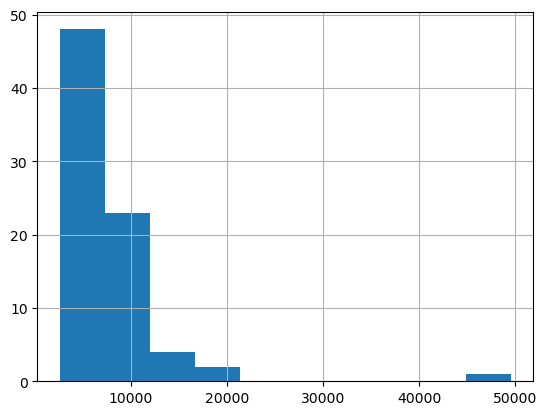

In [89]:
from scipy.stats import shapiro

_, pval = shapiro(np.array(df['Left-Lateral-Ventricle_fs6']))
print(pval)
df['Left-Lateral-Ventricle_fs6'].hist()

In [90]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
from statsmodels.stats.multitest import multipletests

empty = ['' for _ in range(len(volumes))]
ibsVShc_fs6 = pd.DataFrame({'Volume' : volumes,
        'Normality IBS pval': empty,
        'Normality HC pval': empty,
        'Comparison pval' : empty,
        'Comparison pval Bonferroni': empty,
        'Comment' : empty})

df_ibs = df_etiv_normed[df_etiv_normed['Diagnose (1=D, 2=C, 3=M, 0=HC)  '] != 0]
df_hc = df_etiv_normed[df_etiv_normed['Diagnose (1=D, 2=C, 3=M, 0=HC)  '] == 0]

# Check normality of IBS
for vol in volumes:
    current_vol_ibs = np.array(df_ibs[f'{vol}_fs6'])
    pval = shapiro(current_vol_ibs).pvalue
    ibsVShc_fs6.loc[ibsVShc_fs6['Volume']==vol, 'Normality IBS pval'] = pval

# Check normality of HC
for vol in volumes:
    current_vol_hc = np.array(df_hc[f'{vol}_fs6'])
    pval = shapiro(current_vol_hc).pvalue
    ibsVShc_fs6.loc[ibsVShc_fs6['Volume']==vol, 'Normality HC pval'] = pval

# Add comment for any non-normal volumes
threshold = 0.05
for vol in volumes:
    if ibsVShc_fs6.loc[ibsVShc_fs6['Volume']==vol, 'Normality IBS pval'].values[0] < threshold or ibsVShc_fs6.loc[ibsVShc_fs6['Volume']==vol, 'Normality HC pval'].values[0] < threshold:
        ibsVShc_fs6.loc[ibsVShc_fs6['Volume']==vol, 'Comment'] = 'Mann-Whitney U'


# Perform suitable comparison between IBS and HC
for vol in volumes:
    current_vol_ibs = np.array(df_ibs[f'{vol}_fs6'])
    current_vol_hc = np.array(df_hc[f'{vol}_fs6'])
    if ibsVShc_fs6.loc[ibsVShc_fs6['Volume']==vol, 'Comment'].values[0] == 'Mann-Whitney U':
        #print(vol, 'non-param')
        pval = mannwhitneyu(current_vol_ibs, current_vol_hc).pvalue
    else:
        pval = ttest_ind(current_vol_ibs, current_vol_hc, equal_var=False).pvalue
    ibsVShc_fs6.loc[ibsVShc_fs6['Volume']==vol, 'Comparison pval'] = pval

# Bonferroni correction of p-values
#ibsVShc_fs6['Comparison pval Bonferroni'] = ibsVShc_fs6['Comparison pval'].apply(multipletests())
pvals = np.array(ibsVShc_fs6['Comparison pval'])
_, corrected_pvals, _, _ = multipletests(pvals, method='bonferroni')
ibsVShc_fs6['Comparison pval Bonferroni'] = corrected_pvals

ibsVShc_fs6

,Volume,Normality IBS pval,Normality HC pval,Comparison pval,Comparison pval Bonferroni,Comment
0,Left-Lateral-Ventricle,0.0,0.012262,0.218568,1,Mann-Whitney U
1,Right-Lateral-Ventricle,0.0,0.003318,0.175604,1,Mann-Whitney U
2,Left-Inf-Lat-Vent,0.027017,0.065782,0.306041,1,Mann-Whitney U
3,Right-Inf-Lat-Vent,0.000125,0.213863,1.0,1,Mann-Whitney U
4,Left-Cerebellum-White-Matter,0.868712,0.985446,0.949833,1,
5,Right-Cerebellum-White-Matter,0.603141,0.706852,0.976594,1,
6,Left-Cerebellum-Cortex,0.887605,0.482798,0.653898,1,
7,Right-Cerebellum-Cortex,0.70217,0.592983,0.758101,1,
8,Left-Thalamus,0.020665,0.155399,0.301181,1,Mann-Whitney U
9,Right-Thalamus,0.224706,0.851854,0.610332,1,


In [91]:
# Generate table
ibsVShc_fs6_latex = ibsVShc_fs6.to_latex(index=False)
with open('../Tables/ibs_VS_hc_fs6.tex', "w") as file:
    file.write(ibsVShc_fs6_latex)

## B: $\mu_2 = \mu_4$
**Compare IBS and HC using FS7 data**

1. Check normality using Shapiro-Wilk's test
2. If normal: use Welch's t-test (not assuming equal variances)
3. If not normal: use Mann-Whitney's U

In [92]:
empty = ['' for _ in range(len(volumes))]
ibsVShc_fs7 = pd.DataFrame({'Volume' : volumes,
        'Normality IBS pval': empty,
        'Normality HC pval': empty,
        'Comparison pval' : empty,
        'Comparison pval Bonferroni': empty,
        'Comment' : empty})

df_ibs = df_etiv_normed[df_etiv_normed['Diagnose (1=D, 2=C, 3=M, 0=HC)  '] != 0]
df_hc = df_etiv_normed[df_etiv_normed['Diagnose (1=D, 2=C, 3=M, 0=HC)  '] == 0]

# Check normality of IBS
for vol in volumes:
    current_vol_ibs = np.array(df_ibs[f'{vol}_fs7'])
    _, pval = shapiro(current_vol_ibs)
    ibsVShc_fs7.loc[ibsVShc_fs7['Volume']==vol, 'Normality IBS pval'] = pval

# Check normality of HC
for vol in volumes:
    current_vol_hc = np.array(df_hc[f'{vol}_fs7'])
    _, pval = shapiro(current_vol_hc)
    ibsVShc_fs7.loc[ibsVShc_fs7['Volume']==vol, 'Normality HC pval'] = pval

# Add comment for any non-normal volumes
threshold = 0.05
for vol in volumes:
    if ibsVShc_fs7.loc[ibsVShc_fs7['Volume']==vol, 'Normality IBS pval'].values[0] < threshold or ibsVShc_fs7.loc[ibsVShc_fs7['Volume']==vol, 'Normality HC pval'].values[0] < threshold:
        ibsVShc_fs7.loc[ibsVShc_fs7['Volume']==vol, 'Comment'] = 'Mann-Whitney U'


# Perform suitable comparison between IBS and HC
for vol in volumes:
    current_vol_ibs = np.array(df_ibs[f'{vol}_fs7'])
    current_vol_hc = np.array(df_hc[f'{vol}_fs7'])
    if ibsVShc_fs7.loc[ibsVShc_fs7['Volume']==vol, 'Comment'].values[0] == 'Mann-Whitney U':
        #print(vol, 'non-param')
        pval = mannwhitneyu(current_vol_ibs, current_vol_hc).pvalue
    else:
        pval = ttest_ind(current_vol_ibs, current_vol_hc, equal_var=False).pvalue
    ibsVShc_fs7.loc[ibsVShc_fs7['Volume']==vol, 'Comparison pval'] = pval

# Bonferroni correction of p-values
#ibsVShc_fs6['Comparison pval Bonferroni'] = ibsVShc_fs6['Comparison pval'].apply(multipletests())
pvals = np.array(ibsVShc_fs7['Comparison pval'])
_, corrected_pvals, _, _ = multipletests(pvals, method='bonferroni')
ibsVShc_fs7['Comparison pval Bonferroni'] = corrected_pvals

ibsVShc_fs7

,Volume,Normality IBS pval,Normality HC pval,Comparison pval,Comparison pval Bonferroni,Comment
0,Left-Lateral-Ventricle,0.0,0.0093,0.246875,1,Mann-Whitney U
1,Right-Lateral-Ventricle,0.0,0.002694,0.207178,1,Mann-Whitney U
2,Left-Inf-Lat-Vent,0.080131,0.088521,0.856348,1,
3,Right-Inf-Lat-Vent,0.000133,0.260428,0.86861,1,Mann-Whitney U
4,Left-Cerebellum-White-Matter,0.004976,0.851036,0.958772,1,Mann-Whitney U
5,Right-Cerebellum-White-Matter,0.003845,0.682588,0.89308,1,Mann-Whitney U
6,Left-Cerebellum-Cortex,0.283041,0.16294,0.990895,1,
7,Right-Cerebellum-Cortex,0.186949,0.236715,0.970661,1,
8,Left-Thalamus,0.629663,0.989272,0.302305,1,
9,Right-Thalamus,0.757557,0.70828,0.188223,1,


In [93]:
# Generate table
ibsVShc_fs7_latex = ibsVShc_fs7.to_latex(index=False)
with open('../Tables/ibs_VS_hc_fs7.tex', "w") as file:
    file.write(ibsVShc_fs7_latex)

## C: $\mu_1 = \mu_2$
**Compare IBS between versions**

1. Check normality of differences using Shapiro-Wilk's test
2. If normal: paired t-test
3. If not normal: Wilcoxon's signed rank-test

In [94]:
from scipy.stats import shapiro, ttest_rel, wilcoxon
from statsmodels.stats.multitest import multipletests

empty = ['' for _ in range(len(volumes))]
ibs_fs6VSfs7 = pd.DataFrame({'Volume' : volumes,
        'Normality differences pval': empty,
        'Comparison pval' : empty,
        'Comparison pval Bonferroni': empty,
        'Comment' : empty})

df_ibs = df_etiv_normed[df_etiv_normed['Diagnose (1=D, 2=C, 3=M, 0=HC)  '] != 0]

# Check normality of differences
for vol in volumes:
    current_vol_diff = np.array(df_ibs[f'{vol}_fs7']) - np.array(df_ibs[f'{vol}_fs6'])
    pval = shapiro(current_vol_diff).pvalue
    ibs_fs6VSfs7.loc[ibs_fs6VSfs7['Volume']==vol, 'Normality differences pval'] = pval

# Add comment for non-normal volumes
threshold = 0.05
for vol in volumes:
    if ibs_fs6VSfs7.loc[ibs_fs6VSfs7['Volume']==vol, 'Normality differences pval'].values[0] < threshold:
        ibs_fs6VSfs7.loc[ibs_fs6VSfs7['Volume']==vol, 'Comment'] = 'Wilcoxon'

# Perform suitable comparison between versions
for vol in volumes:
    current_vol_fs7 = np.array(df_ibs[f'{vol}_fs7'])
    current_vol_fs6 = np.array(df_ibs[f'{vol}_fs6'])
    if ibs_fs6VSfs7.loc[ibs_fs6VSfs7['Volume']==vol, 'Comment'].values[0] == 'Wilcoxon':
        pval = wilcoxon(current_vol_fs7, current_vol_fs6).pvalue
    else:
        pval = ttest_rel(current_vol_fs7, current_vol_fs6).pvalue
    ibs_fs6VSfs7.loc[ibs_fs6VSfs7['Volume']==vol, 'Comparison pval'] = pval

# Bonferroni correction of p-values
pvals = np.array(ibs_fs6VSfs7['Comparison pval'])
_, corrected_pvals, _,_ = multipletests(pvals, method='bonferroni')
ibs_fs6VSfs7['Comparison pval Bonferroni'] = corrected_pvals

ibs_fs6VSfs7

,Volume,Normality differences pval,Comparison pval,Comparison pval Bonferroni,Comment
0,Left-Lateral-Ventricle,0.0,0.000087,0.003472,Wilcoxon
1,Right-Lateral-Ventricle,0.0,0.0,0.000001,Wilcoxon
2,Left-Inf-Lat-Vent,0.375408,0.000009,0.000378,
3,Right-Inf-Lat-Vent,0.158059,0.81837,1,
4,Left-Cerebellum-White-Matter,0.005076,0.447088,1,Wilcoxon
5,Right-Cerebellum-White-Matter,0.000007,0.128844,1,Wilcoxon
6,Left-Cerebellum-Cortex,0.000002,0.0,0.000007,Wilcoxon
7,Right-Cerebellum-Cortex,0.000033,0.000001,0.00005,Wilcoxon
8,Left-Thalamus,0.006281,0.107526,1,Wilcoxon
9,Right-Thalamus,0.100475,0.599563,1,


In [95]:
# Generate table
ibs_fs6VSfs7_latex = ibs_fs6VSfs7.to_latex(index=False)
with open('../Tables/ibs_fs6_VS_fs7.tex', "w") as file:
    file.write(ibs_fs6VSfs7_latex)

## D: $\mu_3 = \mu_4$

**Compare HC between versions**

**NB:** Do we need to check normality of the differences? I think this is an assumption for the paired t-test.

In [96]:
from scipy.stats import shapiro, ttest_rel, wilcoxon
from statsmodels.stats.multitest import multipletests

empty = ['' for _ in range(len(volumes))]
hc_fs6VSfs7 = pd.DataFrame({'Volume' : volumes,
        'Normality differences pval': empty,
        'Comparison pval' : empty,
        'Comparison pval Bonferroni': empty,
        'Comment' : empty})

df_hc = df_etiv_normed[df_etiv_normed['Diagnose (1=D, 2=C, 3=M, 0=HC)  '] == 0]

# Check normality of differences
for vol in volumes:
    current_vol_diff = np.array(df_hc[f'{vol}_fs7']) - np.array(df_hc[f'{vol}_fs6'])
    pval = shapiro(current_vol_diff).pvalue
    hc_fs6VSfs7.loc[hc_fs6VSfs7['Volume']==vol, 'Normality differences pval'] = pval

# Add comment for non-normal volumes
threshold = 0.05
for vol in volumes:
    if hc_fs6VSfs7.loc[hc_fs6VSfs7['Volume']==vol, 'Normality differences pval'].values[0] < threshold:
        hc_fs6VSfs7.loc[hc_fs6VSfs7['Volume']==vol, 'Comment'] = 'Wilcoxon'

# Perform suitable comparison between versions
for vol in volumes:
    current_vol_fs7 = np.array(df_hc[f'{vol}_fs7'])
    current_vol_fs6 = np.array(df_hc[f'{vol}_fs6'])
    if hc_fs6VSfs7.loc[hc_fs6VSfs7['Volume']==vol, 'Comment'].values[0] == 'Wilcoxon':
        pval = wilcoxon(current_vol_fs7, current_vol_fs6).pvalue
    else:
        pval = ttest_rel(current_vol_fs7, current_vol_fs6).pvalue
    hc_fs6VSfs7.loc[hc_fs6VSfs7['Volume']==vol, 'Comparison pval'] = pval

# Bonferroni correction of p-values
pvals = np.array(hc_fs6VSfs7['Comparison pval'])
_, corrected_pvals, _,_ = multipletests(pvals, method='bonferroni')
hc_fs6VSfs7['Comparison pval Bonferroni'] = corrected_pvals

hc_fs6VSfs7

,Volume,Normality differences pval,Comparison pval,Comparison pval Bonferroni,Comment
0,Left-Lateral-Ventricle,0.00001,0.027409,1,Wilcoxon
1,Right-Lateral-Ventricle,0.000002,0.002759,0.110365,Wilcoxon
2,Left-Inf-Lat-Vent,0.170784,0.484447,1,
3,Right-Inf-Lat-Vent,0.924769,0.757882,1,
4,Left-Cerebellum-White-Matter,0.000003,0.654464,1,Wilcoxon
5,Right-Cerebellum-White-Matter,0.000267,0.765542,1,Wilcoxon
6,Left-Cerebellum-Cortex,0.0,0.000087,0.003488,Wilcoxon
7,Right-Cerebellum-Cortex,0.0,0.000024,0.000971,Wilcoxon
8,Left-Thalamus,0.001678,0.404681,1,Wilcoxon
9,Right-Thalamus,0.000009,0.717209,1,Wilcoxon


In [97]:
# Generate table
hc_fs6VSfs7_latex = hc_fs6VSfs7.to_latex(index=False)
with open('../Tables/hc_fs6_VS_fs7.tex', "w") as file:
    file.write(hc_fs6VSfs7_latex)